# Matin Ghorbani 6.8.Assignment
---

## Implement a simple neural network (Multi Layer Perceptron) on Scikit-Learn digits dataset
---

## Import Dependencies

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [11]:
dataset = load_digits()
dataset.data.shape

(1797, 64)

4

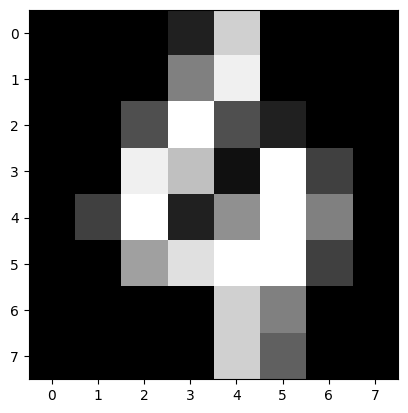

In [12]:
test = 100
img = dataset.images[test]
plt.imshow(img, cmap='gray')
dataset.target[test]

In [14]:
X = dataset.data
Y = dataset.target

Y = np.eye(10)[Y]  # Convert Y to one hot

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1437, 64), (1437, 10), (360, 64), (360, 10))

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))

def root_mean_squired_error(Y_pred, Y_test):
    return np.sqrt(np.mean((Y_pred - Y_test) ** 2))

In [19]:
Dimension_input = x_train.shape[1]
Dimension_output = y_train.shape[1]

H1 = 128
H2 = 32

lr = .001
epochs = 80

print(f'Dimension input: {Dimension_input}, Dimension output: {Dimension_output}')

Dimension input: 64, Dimension output: 10


In [24]:
W1, W2, W3 = np.random.randn(Dimension_input, H1), np.random.randn(H1, H2), np.random.randn(H2, Dimension_output)

In [25]:
B1, B2, B3 = np.random.randn(1, H1), np.random.randn(1, H2), np.random.randn(1, Dimension_output)

In [29]:
for epoch in range(epochs):

    # Train Part
    
    Y_pred_train = []
    for x, y in zip(x_train, y_train):

        # Forward Part
        x = x.reshape(-1, 1)

        # Layer 1
        out1 = sigmoid(x.T @ W1 + B1)

        # Layer 2
        out2 = sigmoid(out1 @ W2 + B2)

        # Layer 3
        out3 = softmax(out2 @ W3 + B3)

        y_pred = out3
        Y_pred_train.append(y_pred)

        # Back Propagation Part

        # Layer 3
        error = -2 * (y - y_pred)
        grad_W3 = out2.T @ error
        grad_B3 = error

        # Layer 2
        error = error @ W3.T * out2 * (1 - out2)
        grad_W2 = out1.T @ error
        grad_B2 = error

        # Layer 1
        error = error @ W2.T * out1 * (1 - out1)
        grad_W1 = x @ error
        grad_B1 = error

        # update

        # Layer 1
        W1 -= lr * grad_W1
        B1 -= lr * grad_B1
        
        # Layer 2
        W2 -= lr * grad_W2
        B2 -= lr * grad_B2

        # Layer 3
        W3 -= lr * grad_W3
        B3 -= lr * grad_B3
    
    # Test Part

    Y_pred_test = []
    for x, y in zip(x_test, y_test):

        x = x.reshape(-1, 1)

        out1 = sigmoid(x.T @ W1 + B1)
        out2 = sigmoid(out1 @ W2 + B2)
        out3 = softmax(out2 @ W3 + B3)

        Y_pred_test.append(out3.T)

    Y_pred_train = np.array(Y_pred_train).reshape(-1, 10)
    Y_pred_test = np.array(Y_pred_test).reshape(-1, 10)

    loss_train, loss_test = root_mean_squired_error(Y_pred_train, y_train), root_mean_squired_error(Y_pred_test, y_test)
    accuracy_train, accuracy_test = np.mean(np.argmax(Y_pred_train, axis=1) == np.argmax(y_pred, axis=1)), np.mean(np.argmax(Y_pred_test, axis=1) == np.argmax(y_test, axis=1))
    
    print(f'loss train: {loss_train}, accuracy train: {accuracy_train}')
    print(f'loss test: {loss_test}, accuracy test: {accuracy_test}')

print('\n\nTrain Completed!\n\n')

loss train: 0.2357576640897113, accuracy train: 0.08907446068197634
loss test: 0.23033921533976603, accuracy test: 0.6388888888888888
loss train: 0.2220311246675853, accuracy train: 0.0918580375782881
loss test: 0.22022679005801735, accuracy test: 0.6888888888888889
loss train: 0.21066106308387897, accuracy train: 0.09812108559498957
loss test: 0.2121985054371386, accuracy test: 0.7055555555555556
loss train: 0.19994524679804976, accuracy train: 0.10160055671537926
loss test: 0.20504299030995699, accuracy test: 0.7166666666666667
loss train: 0.19018771580389782, accuracy train: 0.09742519137091162
loss test: 0.1984758450692517, accuracy test: 0.7416666666666667
loss train: 0.18167765706768438, accuracy train: 0.1022964509394572
loss test: 0.19151975668161497, accuracy test: 0.7555555555555555
loss train: 0.17419608373671586, accuracy train: 0.1057759220598469
loss test: 0.18628020683843505, accuracy test: 0.7638888888888888
loss train: 0.1674518685016487, accuracy train: 0.105080027835

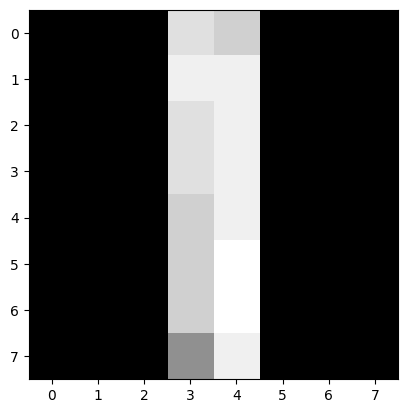

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('input/test4.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

In [32]:
image = image.reshape(64, 1)
x = image

# forward
# layer 1
out1 = sigmoid(x.T @ W1 + B1)

# layer 2
out2 = sigmoid(out1 @ W2 + B2)

# layer 3
out3 = sigmoid(out2 @ W3 + B3)
y_pred = out3

print(f'y pred: {y_pred}')
print(np.argmax(y_pred))

y pred: [[0.26508363 0.99958    0.76564661 0.39855284 0.68909595 0.53594097
  0.04866996 0.90924695 0.71917583 0.48228814]]
1
